# Assignment #3: Clusters

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print("Successfully imported the libraries.")

Successfully imported the libraries.


## Reading and describing the metadata

In [2]:
fpn_csv = '/Users/jason/Desktop/Parsons/SpringSemester/MachineLearning/ML_assignment_3/cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [3]:
# Names of the columns
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [4]:
primary_medium_data = pd.get_dummies(data['primary_medium'])
art_movement_data = pd.get_dummies(data['art_movement'])
country_data = pd.get_dummies(data['country_of_origin'])

In [5]:
data.head(5)
primary_medium_data.head(5)
art_movement_data.head(5)
country_data.head(5)

,Lithuania / America,America,American,Argentina,Argentina / Italy,Argentine,Armenia / America,Australia,Austria,Belgium,...,Spain,Sri Lanka,Switzerland,Switzerland / Brazil,Transylvania / France,UK,United States,Venezuela,Wales,Zambia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Creating a subset of columns

In [7]:
# Conver the medium into a float
# Adding primary medium tomorrow Rye, sorry fr the hold up!

new_data = pd.concat([data, primary_medium_data, art_movement_data, country_data], axis=1, join_axes=[data.index])

X = new_data[['pl', 'si', 'va', 'te', 'co', 'or', 'sh', 'po', 'li', 'ar' ]]

In [8]:
X.head()

,pl,si,va,te,co,or,sh,po,li,ar
0,2,2,3,0,0,4,3,0,0,5
1,4,3,1,3,0,3,2,0,0,5
2,3,0,2,4,4,2,4,0,0,5
3,4,3,1,2,0,2,4,0,0,5
4,1,0,1,4,1,0,4,0,0,5


# KMeans

In [9]:
from sklearn.cluster import KMeans
print("Successfully imported KMeans.")

Successfully imported KMeans.


## Plot Inertia scores (via number of clusters)

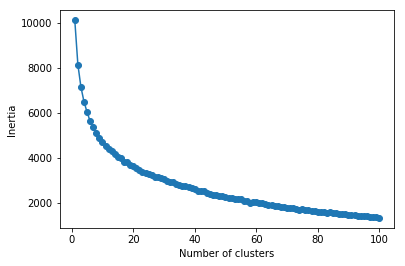

In [10]:
# First attempt at fitting K means to view change in Inertia.
# Container to store inertia scores over iterations
distortions = []

# Fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# Vizualize change in Inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Create silhouette plots (Assess various specifications for `n_clusters` in `KMeans`)

In [11]:
# The amount of clusters that will be shown

# range_n_clusters = [5, 10, 15, 20, 25, 30, 35]
range_n_clusters = [5, 10, 15, 20]

Successfully imported the libraries.
For n_clusters = 5 The average silhouette_score is : 0.166655937608


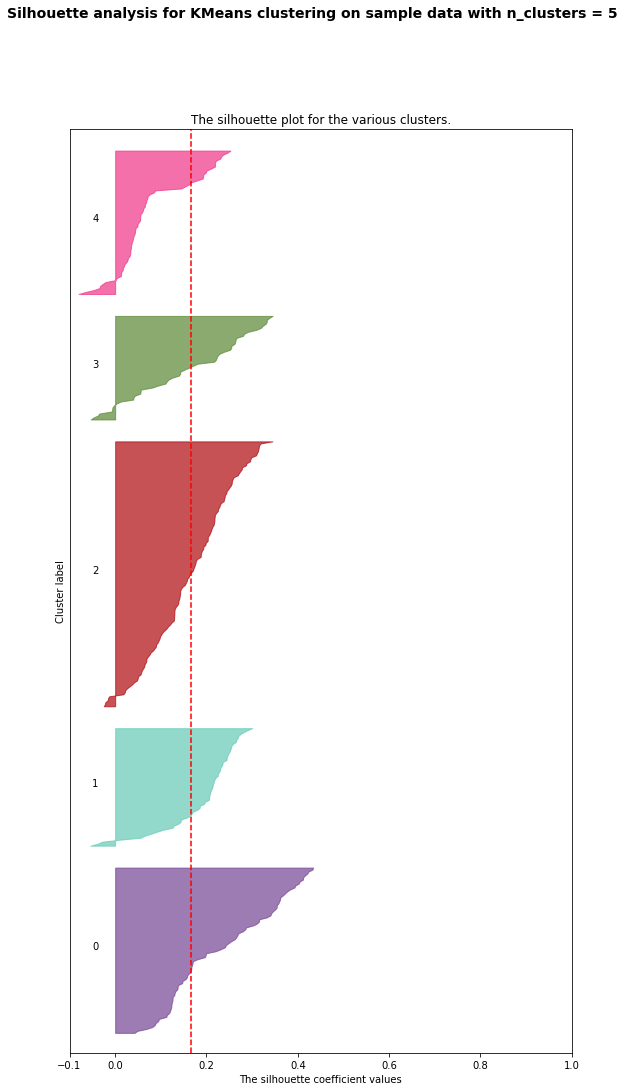

For n_clusters = 10 The average silhouette_score is : 0.154480665747


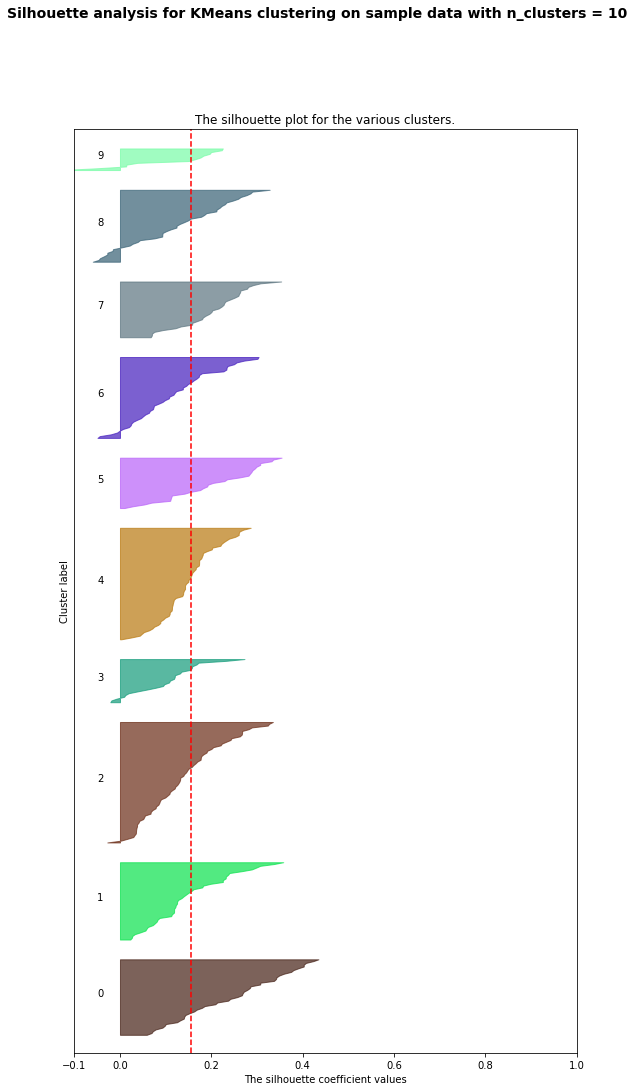

For n_clusters = 15 The average silhouette_score is : 0.15520275766


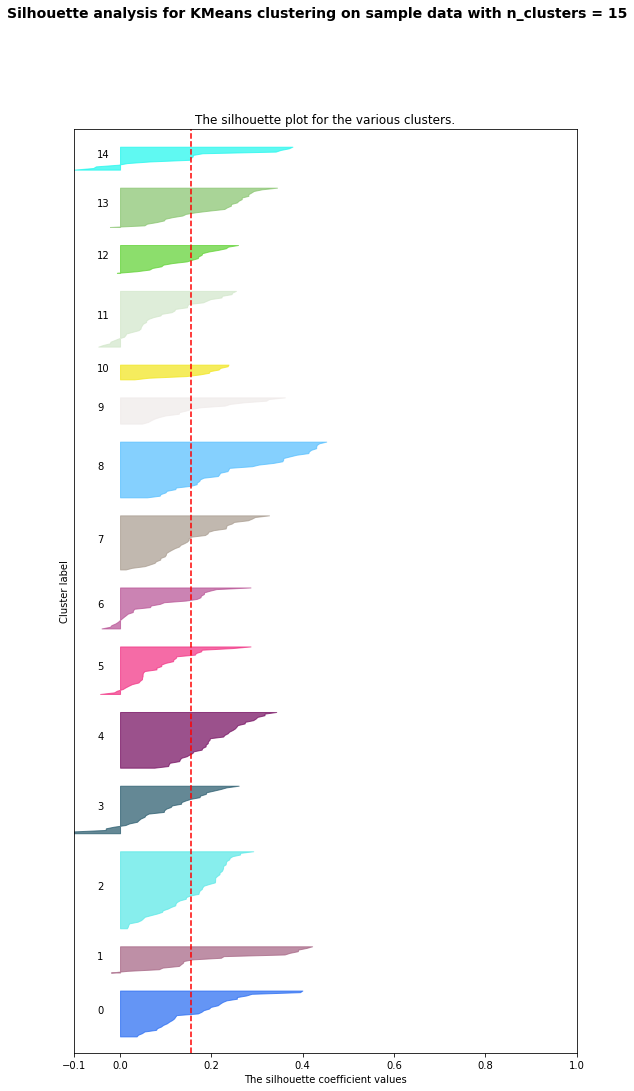

For n_clusters = 20 The average silhouette_score is : 0.150310873987


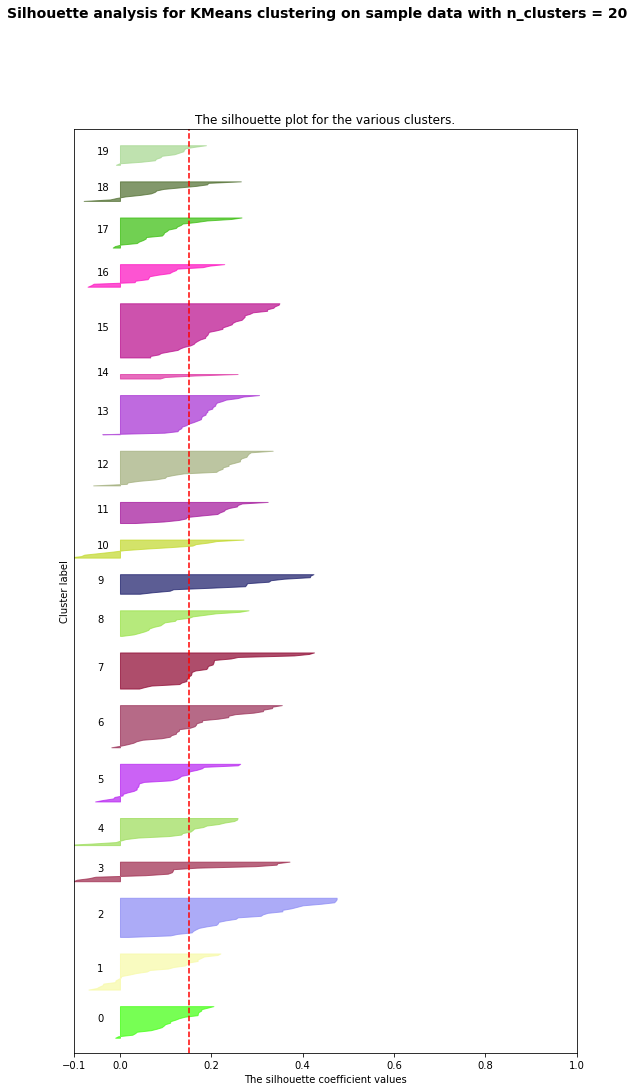

In [12]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random
print("Successfully imported the libraries.")

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Final Fit

In [14]:
# set the number of clusters in the final model
my_n_clusters = 4

In [15]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## The Results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [16]:
from IPython.display import Image

for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print(str(j+2) + '_small.jpg')
#             fname = '/Users/jason/Desktop/Parsons/SpringSemester/MachineLearning/ML_assignment_3/img_small/' + str(j+2) + '_small.jpg'
#             display(Image(filename=fname))

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
37_small.jpg
62_small.jpg
71_small.jpg
76_small.jpg
96_small.jpg
111_small.jpg
114_small.jpg
115_small.jpg
127_small.jpg
129_small.jpg
131_small.jpg
135_small.jpg
146_small.jpg
150_small.jpg
153_small.jpg
161_small.jpg
172_small.jpg
174_small.jpg
188_small.jpg
189_small.jpg
193_small.jpg
198_small.jpg
200_small.jpg
204_small.jpg
206_small.jpg
207_small.jpg
211_small.jpg
215_small.jpg
218_small.jpg
226_small.jpg
227_small.jpg
241_small.jpg
252_small.jpg
257_small.jpg
258_small.jpg
261_small.jpg
263_small.jpg
278_small.jpg
282_small.jpg
283_small.jpg
285_small.jpg
288_small.jpg
292_small.jpg
293_small.jpg
294_small.jpg
300_small.jpg
301_small.jpg
304_small.jpg
308_small.jpg
311_small.jpg
312_small.jpg
318_small.jpg
320_small.jpg
330_small.jpg
338_small.jpg
344_small.jpg
348_small.jpg
356_small.jpg
359_small.jpg
361_small.jpg
365_small.jpg
370_sm

In [17]:
filename = "cluster.html"
dir = '/Users/jason/Desktop/Parsons/SpringSemester/MachineLearning/ML_assignment_3/'

f = open(dir + filename,"w") 
for i in range(0, max(km.labels_)+1):
    f.write("<h2> Images in cluster: " + str(i) + "</h2>")
    
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            f.write( "<img src=" + dir + 'img_small/'+ str(data['s_no'][j]) +
                    '_small.jpg style=\"display:  inline-block\" width=\'100\' height=\'100\' d-cluster=' + str(km.labels_[j]) + '>')
            
f.close()
print("HTML Page Successfully Generated.")

HTML Page Successfully Generated.
